Copyright (c) 2018 - 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis


# (가제) 파이썬 데이터 분석 - Code Examples

# 1.2 멕시코 프랜차이즈 Chipotle의 주문 데이터 분석하기

-----
-----

### 1. 데이터의 기초 정보 살펴보기

#### [Chipotle 데이터셋의 기본 정보]

In [3]:
# -*- coding: utf-8 -*-

import pandas as pd

url = 'https://raw.githubusercontent.com/yoonkt200/python-data-analysis/master/data/chipotle.tsv'
chipo = pd.read_csv(url, sep = '\t') # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.

In [4]:
print(chipo.shape)
print("------------------------------------")
print(chipo.info())

(4622, 5)
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null int64
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(2), object(3)
memory usage: 180.6+ KB
None


#### [Chipotle 데이터셋의 행과 열, 데이터]

In [5]:
chipo.head(10) # Dataframe에서 순서대로 10개의 row 데이터를 보여줍니다.

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [6]:
print(chipo.columns)
print("------------------------------------")
print(chipo.index)

Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
------------------------------------
RangeIndex(start=0, stop=4622, step=1)


-----

### 2. 데이터의 통계적, 수치적 특징 파악

##### 데이터의 수치적 특징 탐색을 위한 간단한 질문들을 정의합니다.

- quantity와 item_price의 요약 통계
- order_id와 item_name의 개수
- choice_description의 결측 데이터 개수

#### [Chipotle 데이터셋의 수치적 특징 파악]

In [7]:
chipo['order_id'] = chipo['order_id'].astype(str) # order_id는 수치적 특성을 갖지 않으므로, str 타입으로 변환
print(chipo.info()) # 변환된 결과 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
order_id              4622 non-null object
quantity              4622 non-null int64
item_name             4622 non-null object
choice_description    3376 non-null object
item_price            4622 non-null object
dtypes: int64(1), object(4)
memory usage: 180.6+ KB
None


In [8]:
print(chipo.describe())

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [9]:
print(len(chipo['order_id'].unique())) # order_id의 개수 출력
print(len(chipo['item_name'].unique())) # item_name의 개수 출력

1834
50


In [10]:
print(chipo.isnull().sum()) # 전체 데이터셋에서 column 기준의 결측값 개수 출력

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64


-----
-----

##### 다음으로, 인사이트를 발견할 수 있을만한 개념적 질문들을 정의합니다.

- 가장 많이 주문한 item은 무엇인지
- 주문된 item의 개수는 몇 개 인지
- item당 주문의 총량은 얼마인지

#### [Chipotle 데이터셋의 개념적 질문 탐색]

In [14]:
# 가장 많이 주문한 item : top 10 출력
item_count = chipo['item_name'].value_counts()
print(item_count[:10])

Chicken Bowl           726
Chicken Burrito        553
Chips and Guacamole    479
Steak Burrito          368
Canned Soft Drink      301
Steak Bowl             211
Chips                  211
Bottled Water          162
Chicken Soft Tacos     115
Chicken Salad Bowl     110
Name: item_name, dtype: int64


In [12]:
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

In [15]:
# 주문된 item의 개수는 몇 개 인지
len(chipo['item_name'].value_counts())

50

In [25]:
# item당 주문 총량 출력하기
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10] # item당 주문 총량

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

In [19]:
order_count = chipo.groupby('item_name')['order_id'].count()
order_count[:10] # item당 주문 횟수

item_name
6 Pack Soft Drink         54
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     11
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            162
Bowl                       2
Burrito                    6
Canned Soda              104
Name: order_id, dtype: int64

#### 추가 : [개념적 탐색 결과 시각화]
- 지금까지의 분석 결과를 간단한 시각화로 표현

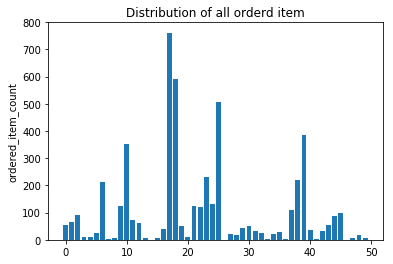

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.tolist()
 
plt.bar(x_pos, order_cnt, align='center')
plt.ylabel('ordered_item_count')
plt.title('Distribution of all orderd item')
 
plt.show()